## Libraries

In [235]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import inv
from __future__ import division

## Parameters

In [260]:
#Hunt-Pointer-Estevez transformation matrix from XYZ to LMS
M = np.asarray([[.40024,0.7076,-.08081], [-.2263,1.16532,0.0457],[0,0,.91822]])
int_M = inv(M)
XYZ2BGR = np.asarray([[3.240479,-1.53715,-0.498535], [-0.969256,1.875991,0.041556],[0.055648,-0.204043,1.057311]])
BGR2XYZ = inv(XYZ2BGR)

# New maximum channel values
L2 = 0.5
M2 = 0.5
S2 = 0.5


## Main

In [267]:
# Load source image and create empty images
img = cv2.imread('./img/cablecar.bmp')# pepper.bmp,baboon.bmp,sailboat.bmp,cablecar.bmp,flowers.bmp,barbara.bmp
width = img.shape[0]
height = img.shape[1]
img_LMS = np.zeros(img.shape)
img_XYZ = np.zeros(img.shape)
img_XYZ_corrected = np.zeros(img.shape)
img_corrected = np.zeros(img.shape)

# First transform image to CIE XYZ
for x in range(width):
    for y in range(height):
        img_XYZ[x,y,:] = np.matmul(BGR2XYZ,img[x,y,:])
        
# Transform CIE XYZ to relative cone responses (LMS) using matrix M
for x in range(width):
    for y in range(height):
        img_LMS[x,y,:] = np.matmul(M,img_XYZ[x,y,:])
    
# Find maximum stimulus per channel and normalize the image using it
L_max = img_LMS[:,:,0].max()
M_max = img_LMS[:,:,1].max()
S_max = img_LMS[:,:,2].max()

img_LMS[:,:,0] = img_LMS[:,:,0]/L_max
img_LMS[:,:,1] = img_LMS[:,:,1]/M_max
img_LMS[:,:,2] = img_LMS[:,:,2]/S_max

# Scale to new maximum values
img_LMS[:,:,0] = img_LMS[:,:,0]/L2
img_LMS[:,:,1] = img_LMS[:,:,1]/M2
img_LMS[:,:,2] = img_LMS[:,:,2]/S2

# Convert image to CIE XYZ
for x in range(width):
    for y in range(height):
        img_XYZ_corrected[x,y,:] = np.matmul(int_M,img_LMS[x,y,:])
    
# Convert from CIE XYZ to BGR
#img_corrected = cv2.cvtColor(img_XYZ_corrected, cv2.COLOR_XYZ2BGR)

for x in range(width):
    for y in range(height):
        img_corrected[x,y,:] = np.matmul(XYZ2BGR,img_XYZ_corrected[x,y,:])
        


## Plot results

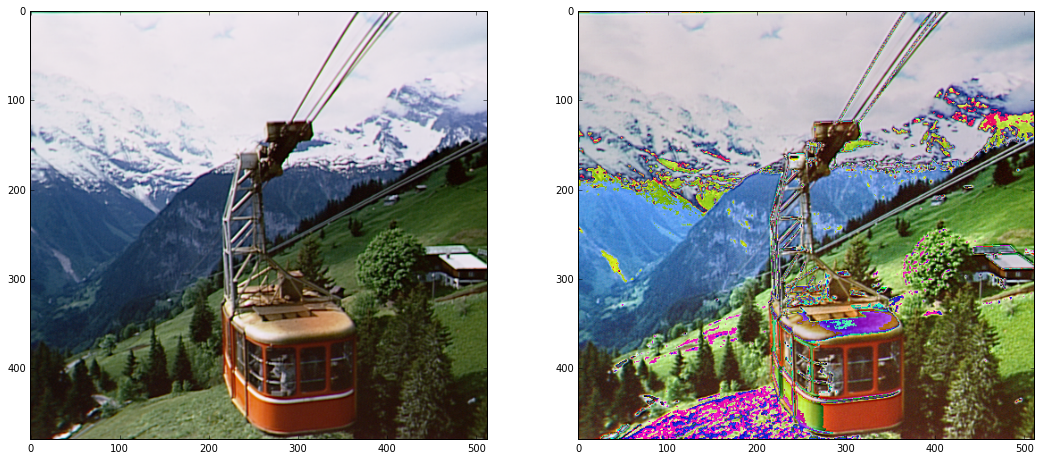

In [268]:
# Show results
results_RGB = np.zeros(img_XYZ.shape)
results_RGB[:,:,0] = img_corrected[:,:,2]
results_RGB[:,:,1] = img_corrected[:,:,1]
results_RGB[:,:,2] = img_corrected[:,:,0]
f, axarr = plt.subplots(1,2,figsize=(18, 16))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[1].imshow(((results_RGB)))


In [266]:
(results_RGB).min()

-0.000570858452143018